**Home Credit Virtual Internship**<Br>
**Nama: Hendri Angkasa**<br>
**Rakamin Academy Batch 26 - Januari 2023**


# IMPORT LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Application (Train Data)

In [2]:
df = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/application_train.csv')
df.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Application (Test Data)

In [3]:
df_test = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Bureau

In [4]:
df_bureau = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/bureau.csv')
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## 4. Bureau Balance

In [5]:
df_bureau_bal = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/bureau_balance.csv')
df_bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## 5. Credit Card Balance

In [6]:
df_credit = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/credit_card_balance.csv')
df_credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


## 6. Installment Payments

In [7]:
df_payment = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/installments_payments.csv')
df_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## 7. POS CASH Balance

In [8]:
df_pos = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/POS_CASH_balance.csv')
df_pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## 8. Previous Application

In [9]:
df_prev = pd.read_csv(r'C:/Users/Hendri/Downloads/home-credit-default-risk/previous_application.csv')
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# DATA EXPLORE ON APPLICATION (TRAIN)

## Data Cleansing

In [10]:
df.shape

(307511, 122)

In [11]:
df.duplicated().sum()

0

In [12]:
df.SK_ID_CURR.nunique()

307511

Tidak ada baris yang terduplikat dan keseluruhan data berisi `ID` yang berbeda untuk setiap baris.

In [14]:
null_percentage = pd.DataFrame((df.isnull().sum()*100/len(df)).sort_values(ascending=False)) # menampilkan nilai persentase suatu kolom memiliki missing values
pd.set_option('display.max_rows', None)
display(pd.DataFrame(null_percentage))

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


Terlihat bahwa banyak sekali feature yang memiliki missing values yang sangat banyak (bahkan hingga lebih dari 50-60%).<br>
Oleh karena itu, kita akan menghapus feature yang mengandung missing values lebih dari 30% (asumsi sendiri).

In [15]:
remove_features = null_percentage[null_percentage[0]>30].index.tolist() # mengambil nama feature dari feature yang mengandung null > 30%

In [16]:
print(f"Jumlah feature yang diremove:",len(remove_features))

Jumlah feature yang diremove: 50


In [18]:
df.drop(remove_features,axis=1,inplace=True)

In [17]:
df_test.drop(remove_features,axis=1,inplace=True)

In [19]:
df.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
17851,120815,0,Cash loans,F,N,N,1,202500.0,1288350.0,37800.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Target Ratio

In [22]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Target variable:<br>
- 1: client with payment difficulties (he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample)<br>
- 0: all other cases (on time)

In [23]:
(df['TARGET'].value_counts()*100/len(df)) # rasio persentase clients dengan pembayaran on time dan yang telat

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

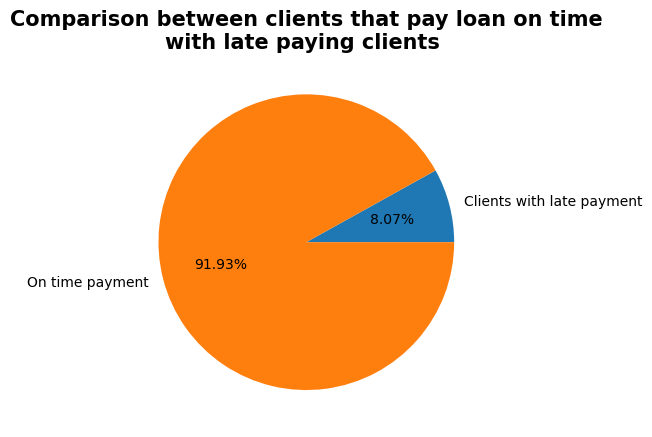

In [24]:
value = [8.07, 91.93]
text = ['Clients with late payment', 'On time payment']

plt.pie(value, labels=text, autopct='%.2f%%')
plt.title('Comparison between clients that pay loan on time\nwith late paying clients ', size = 15, fontweight='bold')
plt.show()

## Feature Extraction (Age)

In [25]:
pd.reset_option('all')

df['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [26]:
df['AGE'] = round(abs(df['DAYS_BIRTH']/365),0)
df['AGE'] = df['AGE'].astype(int)

In [27]:
df['AGE']

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: AGE, Length: 307511, dtype: int32

In [28]:
df_test['AGE'] = round(abs(df_test['DAYS_BIRTH']/365),0) # terapkan untuk test set juga
df_test['AGE'] = df_test['AGE'].astype(int)

In [29]:
df.drop('DAYS_BIRTH',axis=1,inplace=True) # remove feature yang sudah diextractc
df_test.drop('DAYS_BIRTH',axis=1,inplace=True) # untuk test set juga

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Grouping Categorical and Numerical Feature

In [31]:
nums_ft = df.select_dtypes(exclude='object')
cats_ft = df.select_dtypes(include='object')

In [32]:
nums = nums_ft.columns.tolist()
cats = cats_ft.columns.tolist()

### Numerical Feature

In [33]:
df[nums].describe().T.sort_values(ascending = False,by = "mean").style.background_gradient().bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="green")

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
AGE,307511.000000,43.938646,11.964047,21.000000,34.000000,43.000000,54.000000,69.000000
HOUR_APPR_PROCESS_START,307511.000000,12.063419,3.265832,0.000000,10.000000,12.000000,14.000000,23.000000
CNT_FAM_MEMBERS,307509.000000,2.152665,0.910682,1.000000,2.000000,2.000000,3.000000,20.000000
REGION_RATING_CLIENT,307511.000000,2.052463,0.509034,1.000000,2.000000,2.000000,2.000000,3.000000


### Categorical Feature

In [34]:
df[cats].describe().T.sort_values(ascending = False,by = "unique").style.background_gradient()\
.bar(subset = ["freq"], color ="green").bar(subset = ["unique"], color ="red").bar(subset = ["count"], color ="cyan")

,count,unique,top,freq
ORGANIZATION_TYPE,307511,58,Business Entity Type 3,67992
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
CODE_GENDER,307511,3,F,202448
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
FLAG_OWN_CAR,307511,2,N,202924


In [35]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int

Pada feature `GENDER`, terdapat value yang invalid yaitu **XNA** sehingga akan diganti menjadi **F** (top value)<br>
Pada feature `NAME_FAMILY_STATUS` juga terdapat value yang invalid yaitu **Unknown** sehingga akan diganti menjadi **Married** (top value) 

In [36]:
df['CODE_GENDER'].replace('XNA', 'F', inplace = True)
df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married', inplace = True)

# EXPLORATORY DATA ANALYSIS (EDA)

## Multivariate Analysis (Correlation)

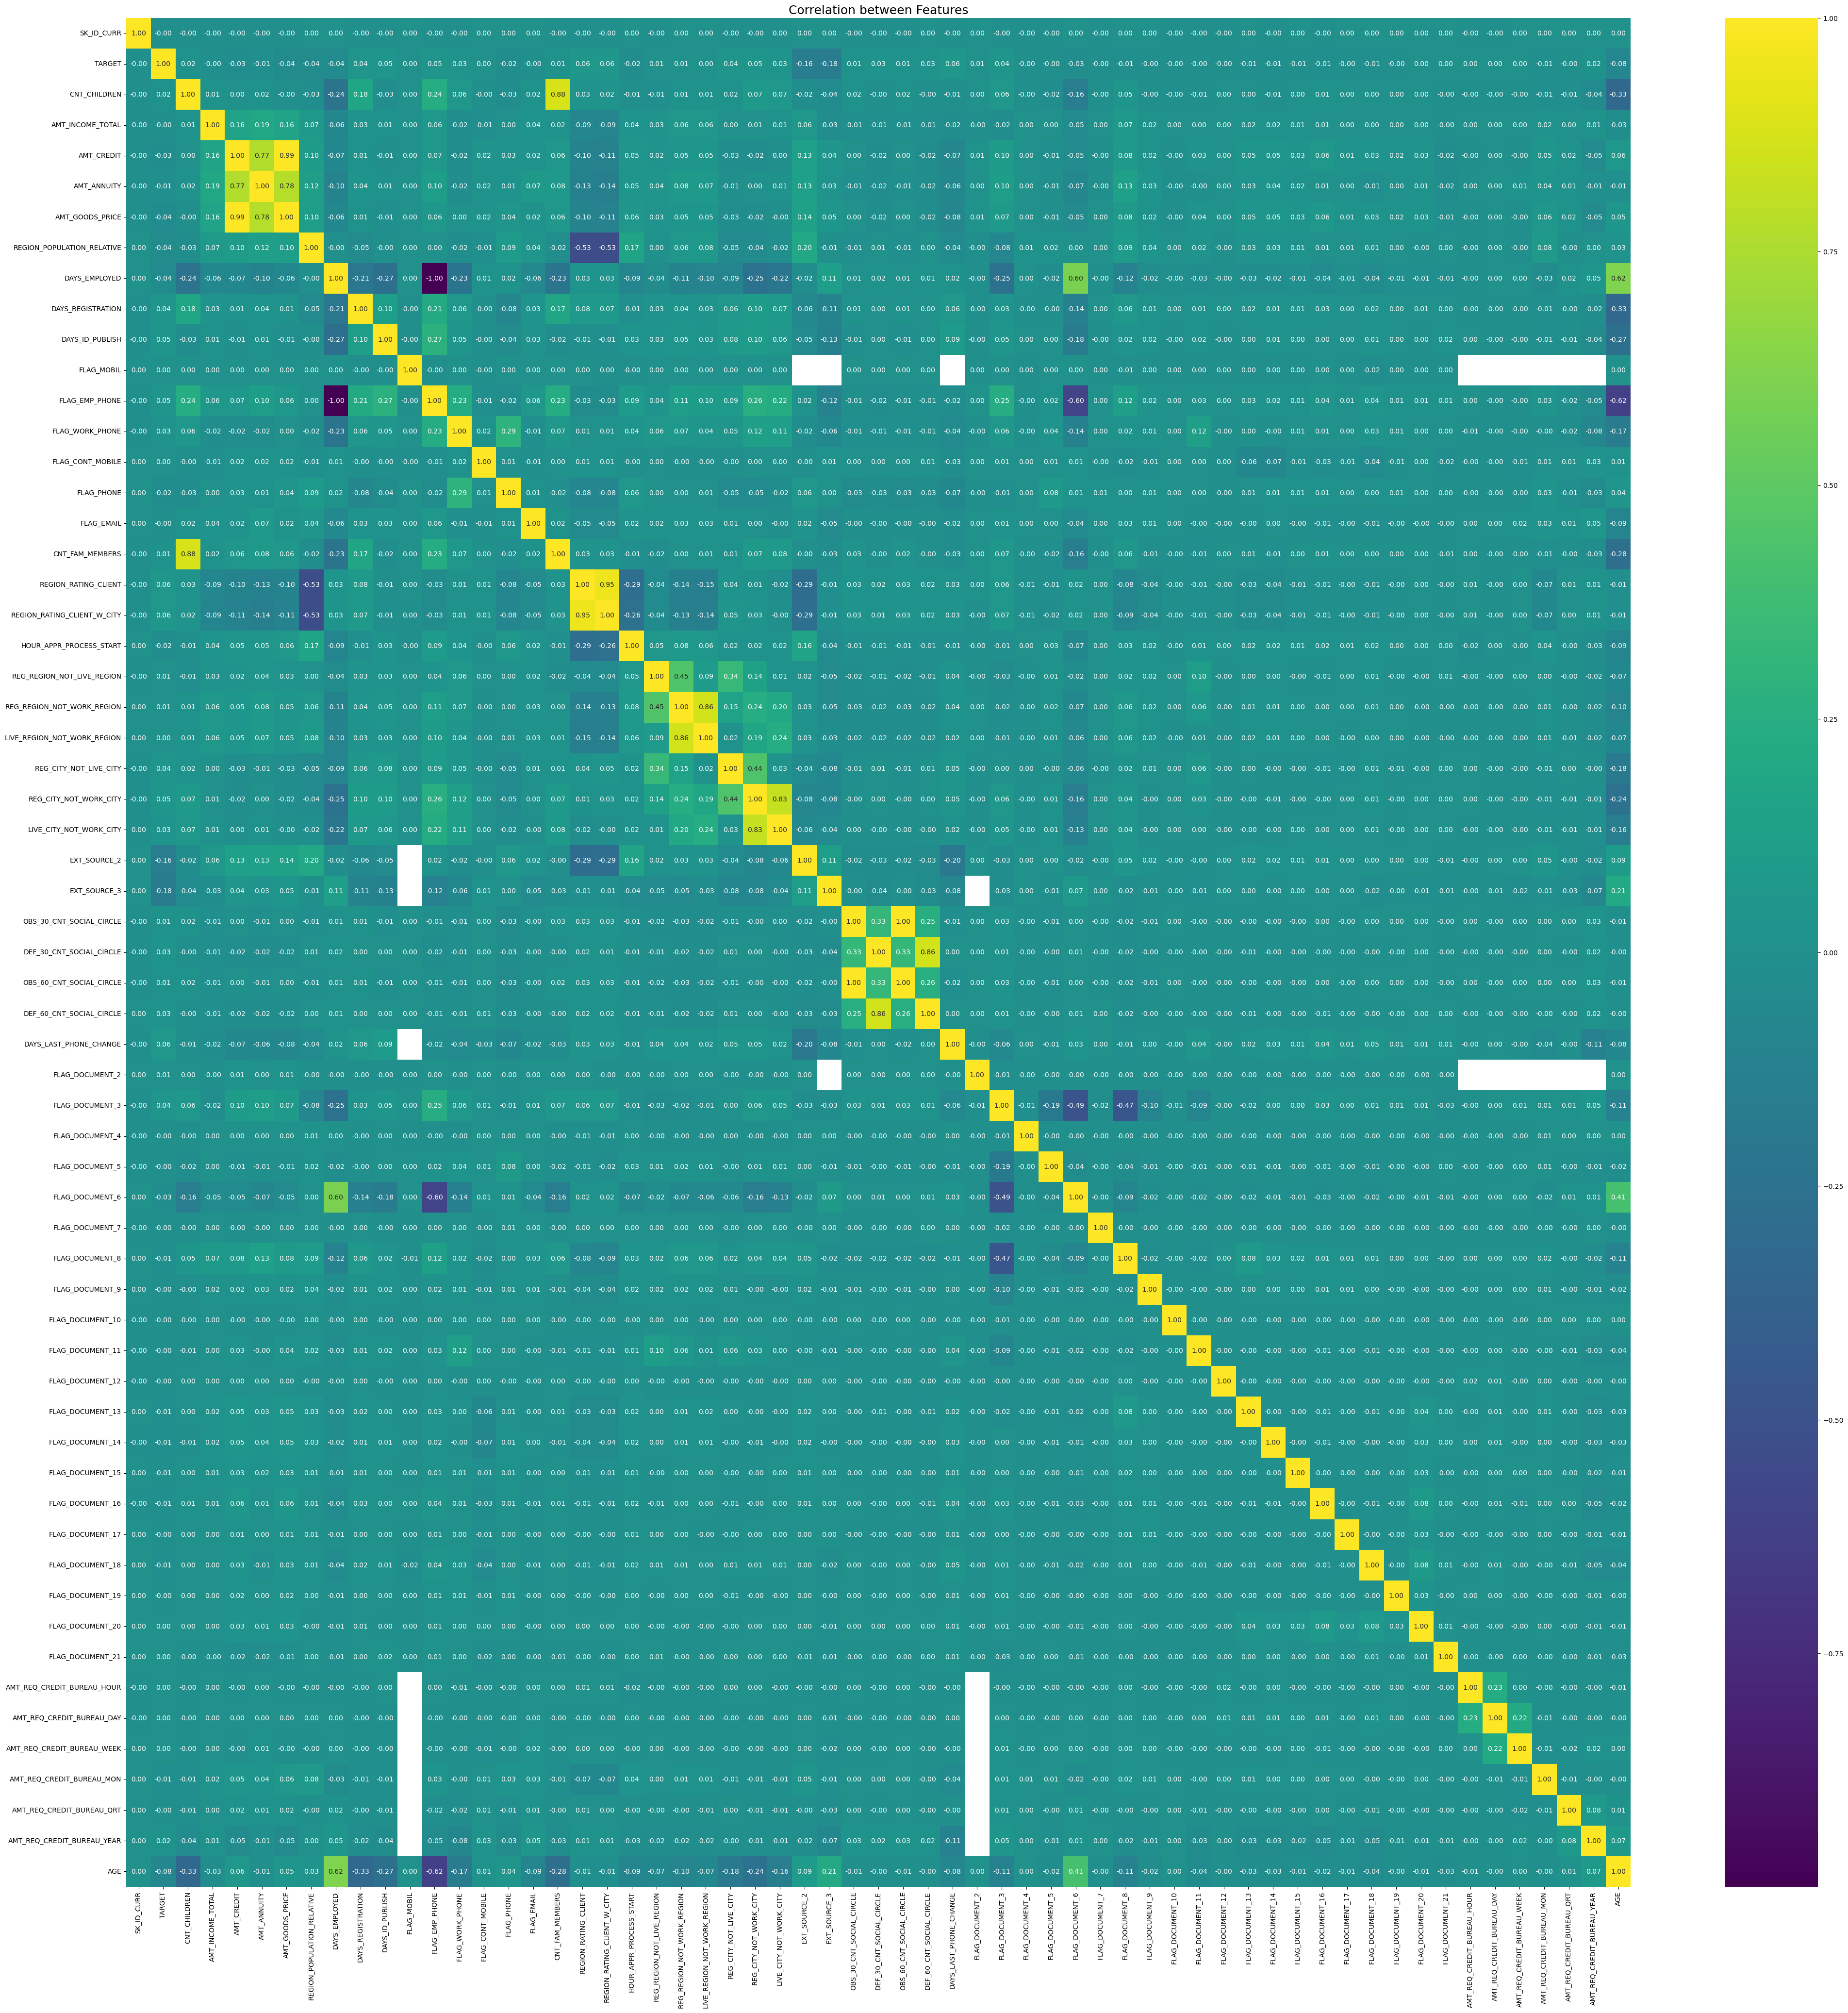

In [37]:
plt.figure(figsize=(50,50))
ax = sns.heatmap(df.corr(),cmap='viridis', annot=True, fmt='.2f')
ax.set_title('Correlation between Features', fontdict={'fontsize':18})

plt.show()

Feature yang saling berkorelasi kuat (r > 0.7) akan diambil salah satunya saja sehingga yang lainnya akan dibuang.

In [38]:
corr = df.corr().abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool))
drop_corr = [col for col in corr.columns if any(corr[col]>0.7)]

In [39]:
drop_corr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [40]:
df.drop(drop_corr,axis=1,inplace=True)
df_test.drop(drop_corr,axis=1,inplace=True) # untuk test set juga

## Feature Selection for Categorical Features

In [41]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary  

Kita akan membuang feature kategorik yang memiliki banyak nilai unique serta yang didominasi oleh salah satu jenis kategori yaitu `ORGANIZATION_TYPE`, `WEEKDAY_APPR_PROCESS_START`, `NAME_HOUSING_TYPE` dan `NAME_TYPE_SUITE`.<br>
Untuk feature `NAME_FAMILY_STATUS` dan `NAME_EDUCATION_TYPE` akan kita keep karena faktor pendidikan dan status pernikahan cukup berpengaruh dalam kondisi ekonomi seseorang. 

In [42]:
df.drop(['ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE'],axis=1,inplace=True)
df_test.drop(['ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE'],axis=1,inplace=True)

In [43]:
df_test['NAME_FAMILY_STATUS'].value_counts()

Married                 32283
Single / not married     7036
Civil marriage           4261
Separated                2955
Widow                    2209
Name: NAME_FAMILY_STATUS, dtype: int64

Kita akan mengganti nilai "Civil marriage" pada feature `NAME_FAMILY_STATUS` pada dataset train dan test menjadi "Married" karena artinya sama (telah menikah).

In [44]:
df['NAME_FAMILY_STATUS'].replace('Civil marriage', 'Married', inplace = True)
df_test['NAME_FAMILY_STATUS'].replace('Civil marriage', 'Married', inplace = True)

In [45]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   NAME_INCOME_TYPE            307511 non-null  object 
 10  NAME_EDUCATION_TYPE         307511 non-null  object 
 11  NAME_FAMILY_STATUS          307511 non-null  object 
 12  REGION_POPULATION_RELATIVE  307511 non-null  float64
 13  DAYS_EMPLOYED 

##Exploring Business Insight

### Gender Value Counts with Respect to Target

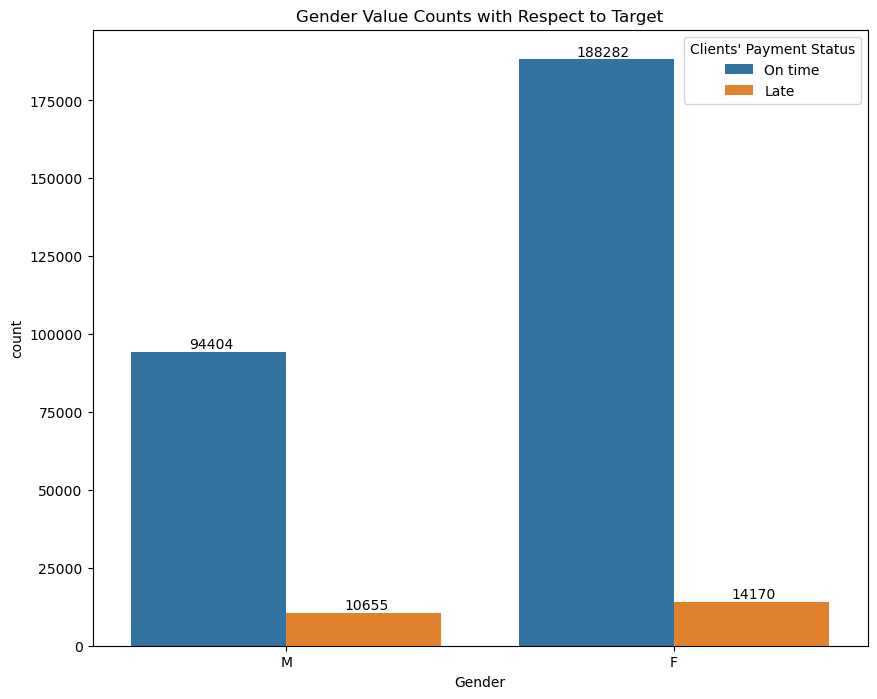

In [46]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df,x='CODE_GENDER',hue='TARGET')
plt.title('Gender Value Counts with Respect to Target')
plt.xlabel('Gender')
ax.legend(title="Clients' Payment Status", labels=['On time','Late'])

for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1000))

plt.show()

In [47]:
print('Persentase client laki-laki yang telat bayar:',round(10655*100/(94404+10655),2),'%')
print('Persentase client perempuan yang telat bayar:',round(14170*100/(188282+14170),2),'%')

Persentase client laki-laki yang telat bayar: 10.14 %
Persentase client perempuan yang telat bayar: 7.0 %


Terlihat bahwa jumlah client perempuan jauh lebih banyak dibanding client laki-laki. <br>Namun, persentase client laki-laki yang telat bayar lebih tinggi dibandingkan persentase client perempuan yang telat bayar.

### Clients with Car / Realty Value Counts with Respect to Target

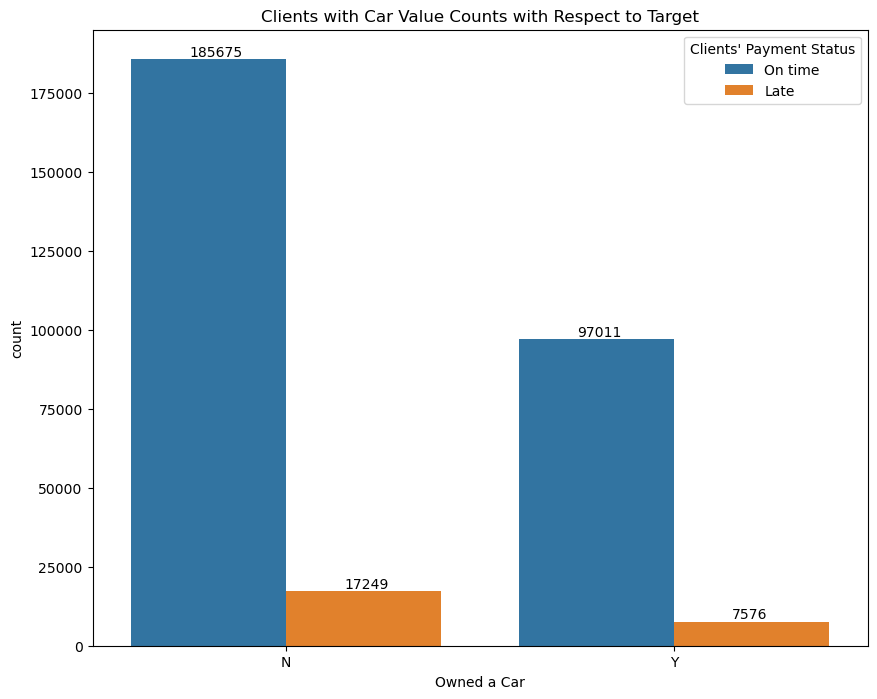

In [47]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df,x='FLAG_OWN_CAR',hue='TARGET')
plt.title('Clients with Car Value Counts with Respect to Target')
plt.xlabel('Owned a Car')
ax.legend(title="Clients' Payment Status", labels=['On time','Late'])

for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1000))

plt.show()

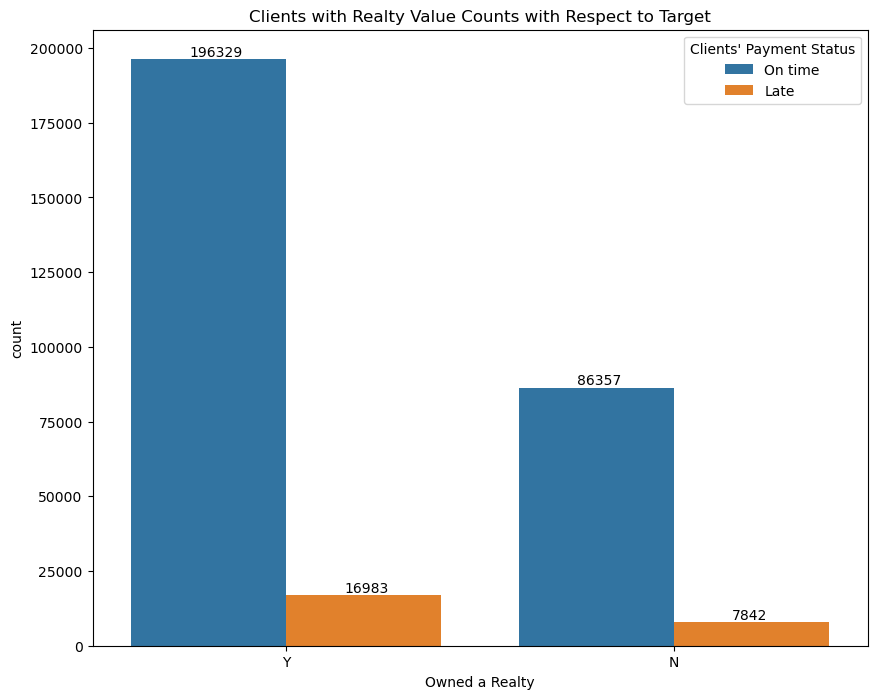

In [48]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df,x='FLAG_OWN_REALTY',hue='TARGET')
plt.title('Clients with Realty Value Counts with Respect to Target')
plt.xlabel('Owned a Realty')
ax.legend(title="Clients' Payment Status", labels=['On time','Late'])

for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1000))

plt.show()

Mayoritas client yang melakukan pinjaman adalah client yang memiliki rumah/apartemen dan tidak memiliki mobil. <br>
Tidak terlihat adanya perbedaan signifikan/hubungan antara kepemilikan mobil/rumah dengan keterlambatan pembayaran.

### Distribution of Number of Children with Respect to Target

In [49]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

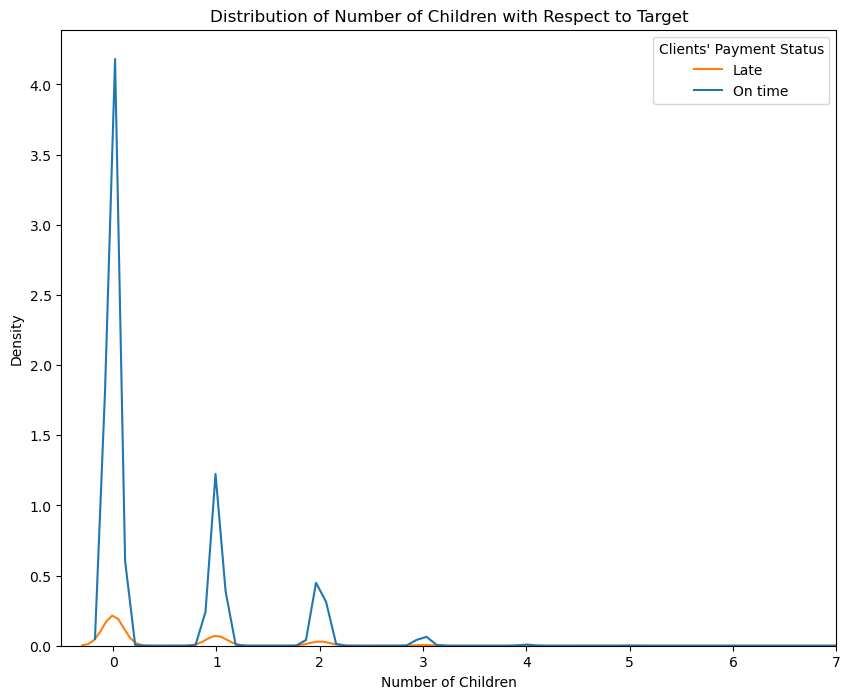

In [50]:
plt.figure(figsize=(10,8))
ax=sns.kdeplot(data=df,x='CNT_CHILDREN',hue='TARGET')
plt.title('Distribution of Number of Children with Respect to Target')
plt.xlabel('Number of Children')
ax.legend(title="Clients' Payment Status", labels=['Late','On time'])
plt.xlim([-0.5,7])

plt.show()

Mayoritas dari client yang melakukan pinjaman dan tepat waktu dalam membayar adalah client yang tidak memiliki anak.<br><br>
**Rekomendasi bisnis**: Melakukan marketing campaign dengan targetnya adalah client yang tidak memiliki anak, karena resiko untuk telat bayarnya sangat kecil dibanding client yang memiliki anak.

### Distribution of Clients' Income with Respect to Target

In [51]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

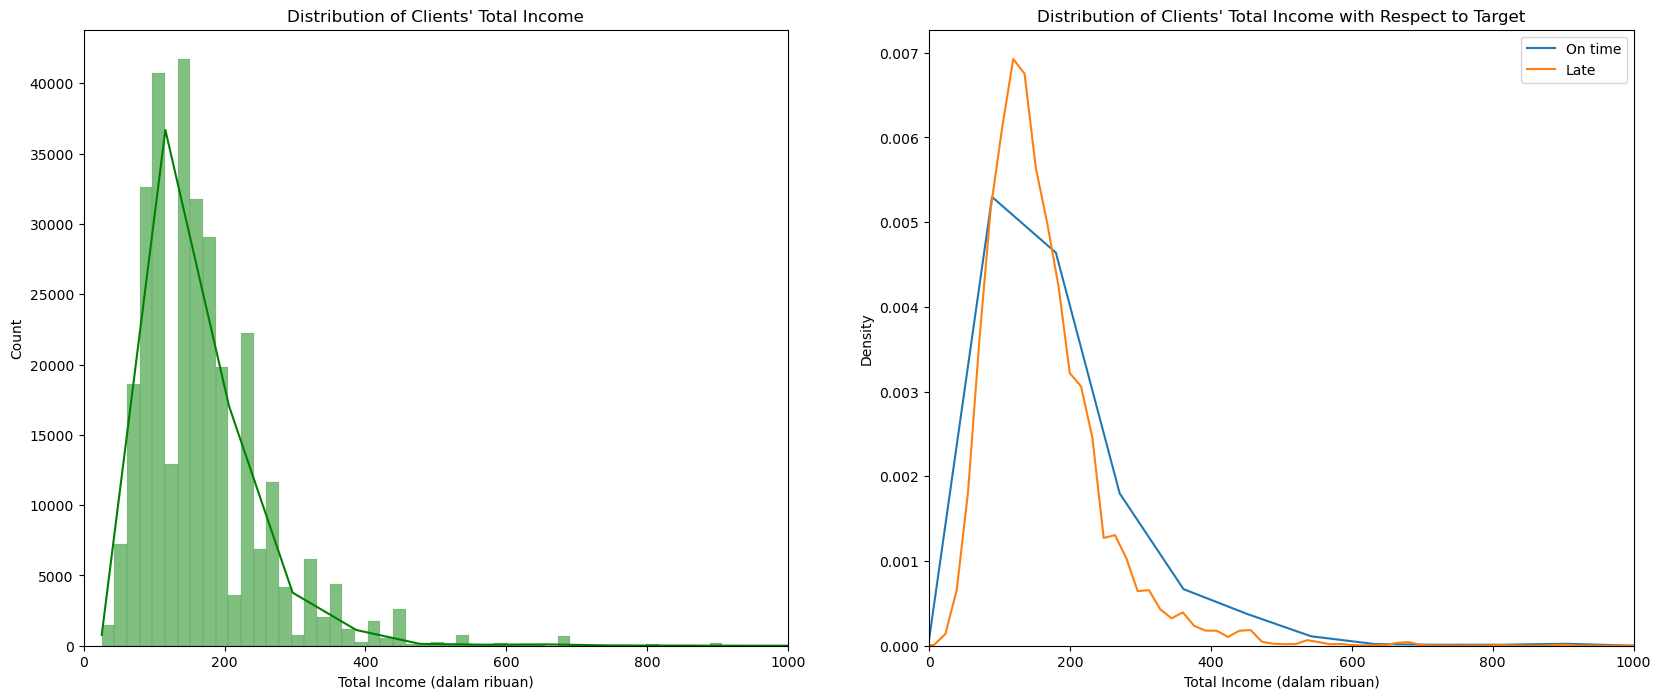

In [52]:
plt.figure(figsize=(20,8))
income=df[df['AMT_INCOME_TOTAL']<1.170000e+08] # nilai ekstrim ini dapat merusak grafik distribusi
income['AMT_INCOME_TOTAL'] = income['AMT_INCOME_TOTAL']/1000 

plt.subplot(1,2,1)
ax=sns.histplot(data=income,x='AMT_INCOME_TOTAL',bins=1000,kde=True,color='green')
plt.title('Distribution of Clients\' Total Income')
plt.xlabel('Total Income (dalam ribuan)')
plt.xlim([0,1000])

plt.subplot(1,2,2)
sns.distplot(income[income['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=10000, label='On time')
sns.distplot(income[income['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, bins=10000, label='Late')
plt.title('Distribution of Clients\' Total Income with Respect to Target')
plt.xlabel('Total Income (dalam ribuan)')
plt.xlim([0,1000])
plt.legend()

plt.show()

Mayoritas dari client yang melakukan pinjaman adalah client dengan total pendapatan di bawah 200 ribu. Selain itu, client yang telat bayar juga mayoritas adalah client dengan total pendapatan di bawah 200 ribu.
<br><br>
**Rekomendasi bisnis**: Melakukan marketing campaign dengan targetnya adalah client dengan total pendapatan di atas 200 ribu, karena resiko untuk telat bayarnya lebih kecil dibandingkan client dengan total pendapatan di bawah 200 ribu.

### Clients' Income Type with Respect to Target

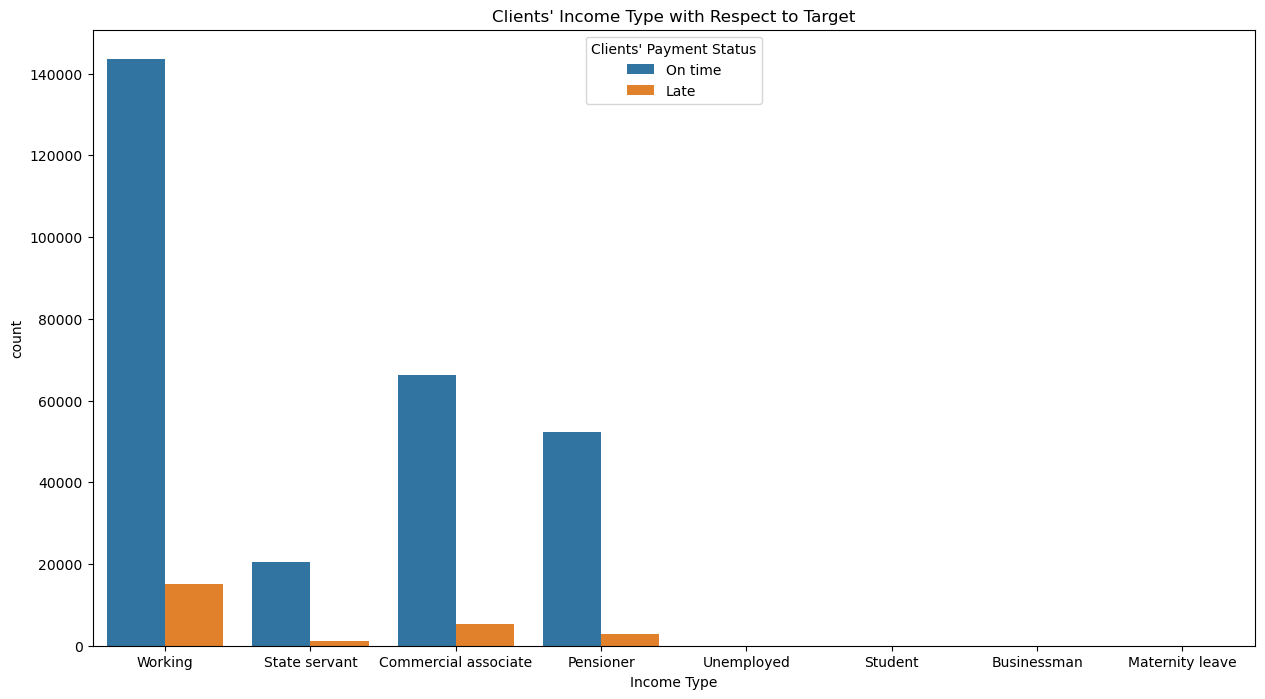

In [53]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='NAME_INCOME_TYPE',hue='TARGET')
plt.title('Clients\' Income Type with Respect to Target')
plt.xlabel('Income Type')
ax.legend(title="Clients' Payment Status", labels=['On time','Late'])

plt.show()

Mayoritas client yang melakukan pinjaman adalah client yang bekerja.<br>
Tidak terlihat adanya perbedaan signifikan/hubungan antara tipe pekerjaan client dengan keterlambatan dalam membayar.

### Clients' Education Type with Respect to Target

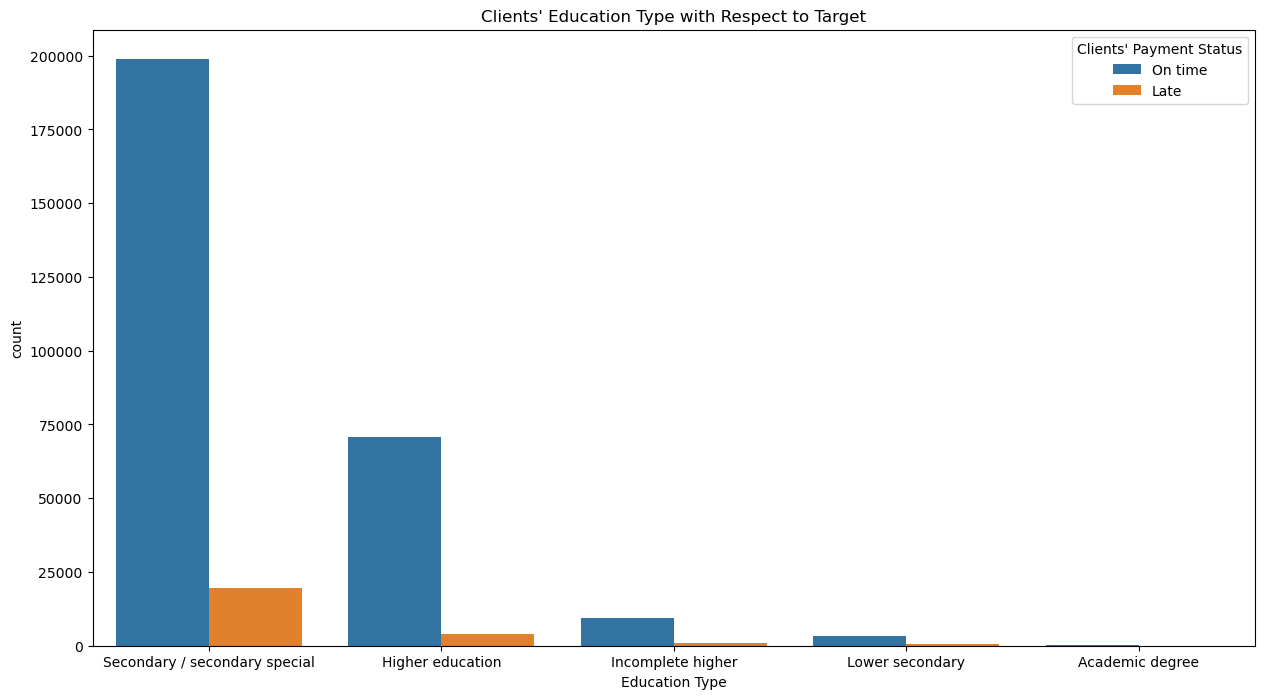

In [54]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='NAME_EDUCATION_TYPE',hue='TARGET')
plt.title('Clients\' Education Type with Respect to Target')
plt.xlabel('Education Type')
ax.legend(title="Clients' Payment Status", labels=['On time','Late'])

plt.show()

Tidak terlihat adanya perbedaan signifikan/hubungan antara tipe pendidikan client dengan keterlambatan dalam membayar.

### Clients' Family Status with Respect to Target

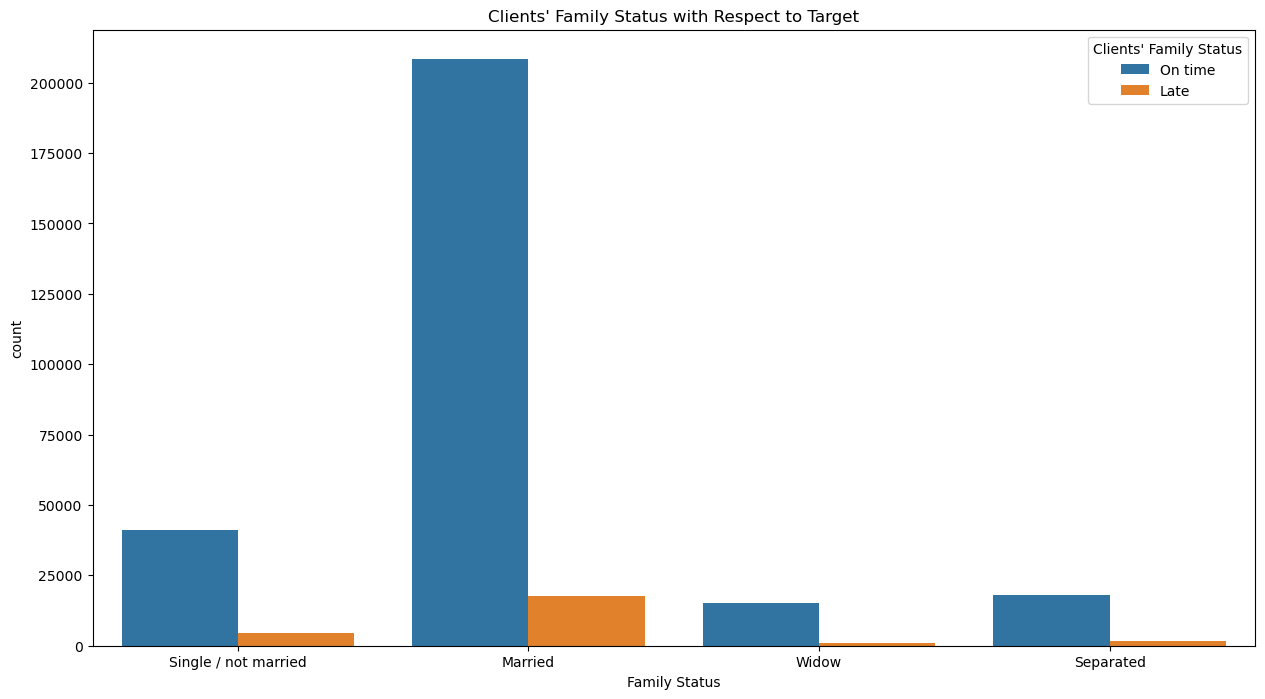

In [55]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.title('Clients\' Family Status with Respect to Target')
plt.xlabel('Family Status')
ax.legend(title="Clients' Family Status", labels=['On time','Late'])

plt.show()

Tidak terlihat adanya perbedaan signifikan/hubungan antara status client dengan keterlambatan dalam membayar.

### Distribution of Clients' Age with Respect to Target

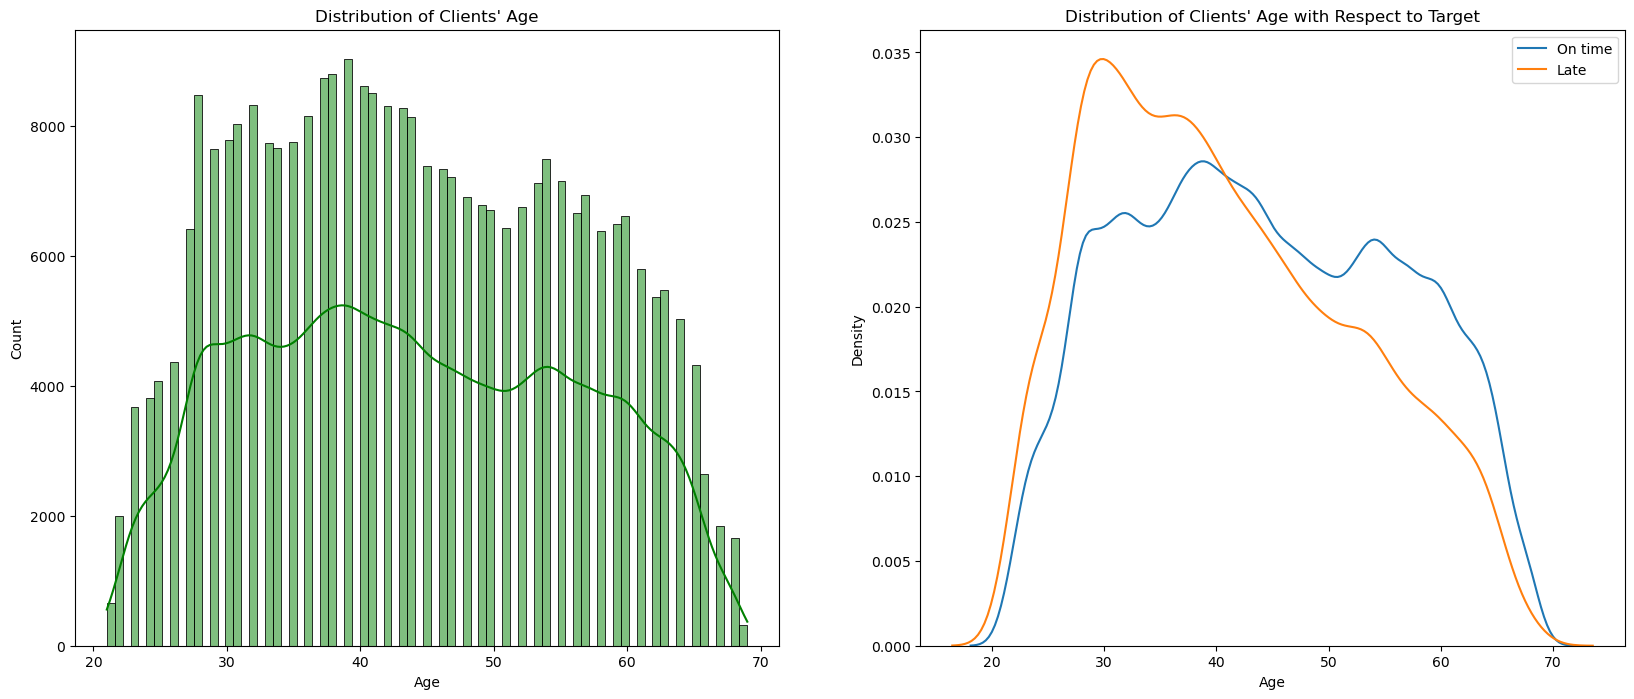

In [56]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
ax=sns.histplot(data=df,x='AGE',kde=True,color='green')
plt.title('Distribution of Clients\' Age')
plt.xlabel('Age')

plt.subplot(1,2,2)
sns.distplot(df[df['TARGET']==0]['AGE'], hist=False, label='On time')
sns.distplot(df[df['TARGET']==1]['AGE'], hist=False, label='Late')
plt.title('Distribution of Clients\' Age with Respect to Target')
plt.xlabel('Age')
plt.legend()

plt.show()

Persebaran umur client yang melakukan pinjaman cukup merata dari 20-70 tahun. Namun, client dengan umur di atas 40 tahun memiliki resiko keterlambatan bayar yang lebih kecil dibandingkan client dengan umur 40 tahun ke bawah.<br><br>
**Rekomendasi bisnis**: Melakukan marketing campaign dengan targetnya adalah client dengan umur di atas 40 tahun, karena resiko untuk telat bayarnya lebih kecil dibandingkan client dengan umur 40 tahun ke bawah.


# DATA PRE-PROCESSING

## Handling Missing Values

In [57]:
((df.isnull().sum()*100/len(df)).sort_values(ascending=False))[0:15]

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_21               0.000000
dtype: float64

In [48]:
null_columns = ((df.isnull().sum()*100/len(df)).sort_values(ascending=False))[0:11].index.tolist()
null_columns

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE']

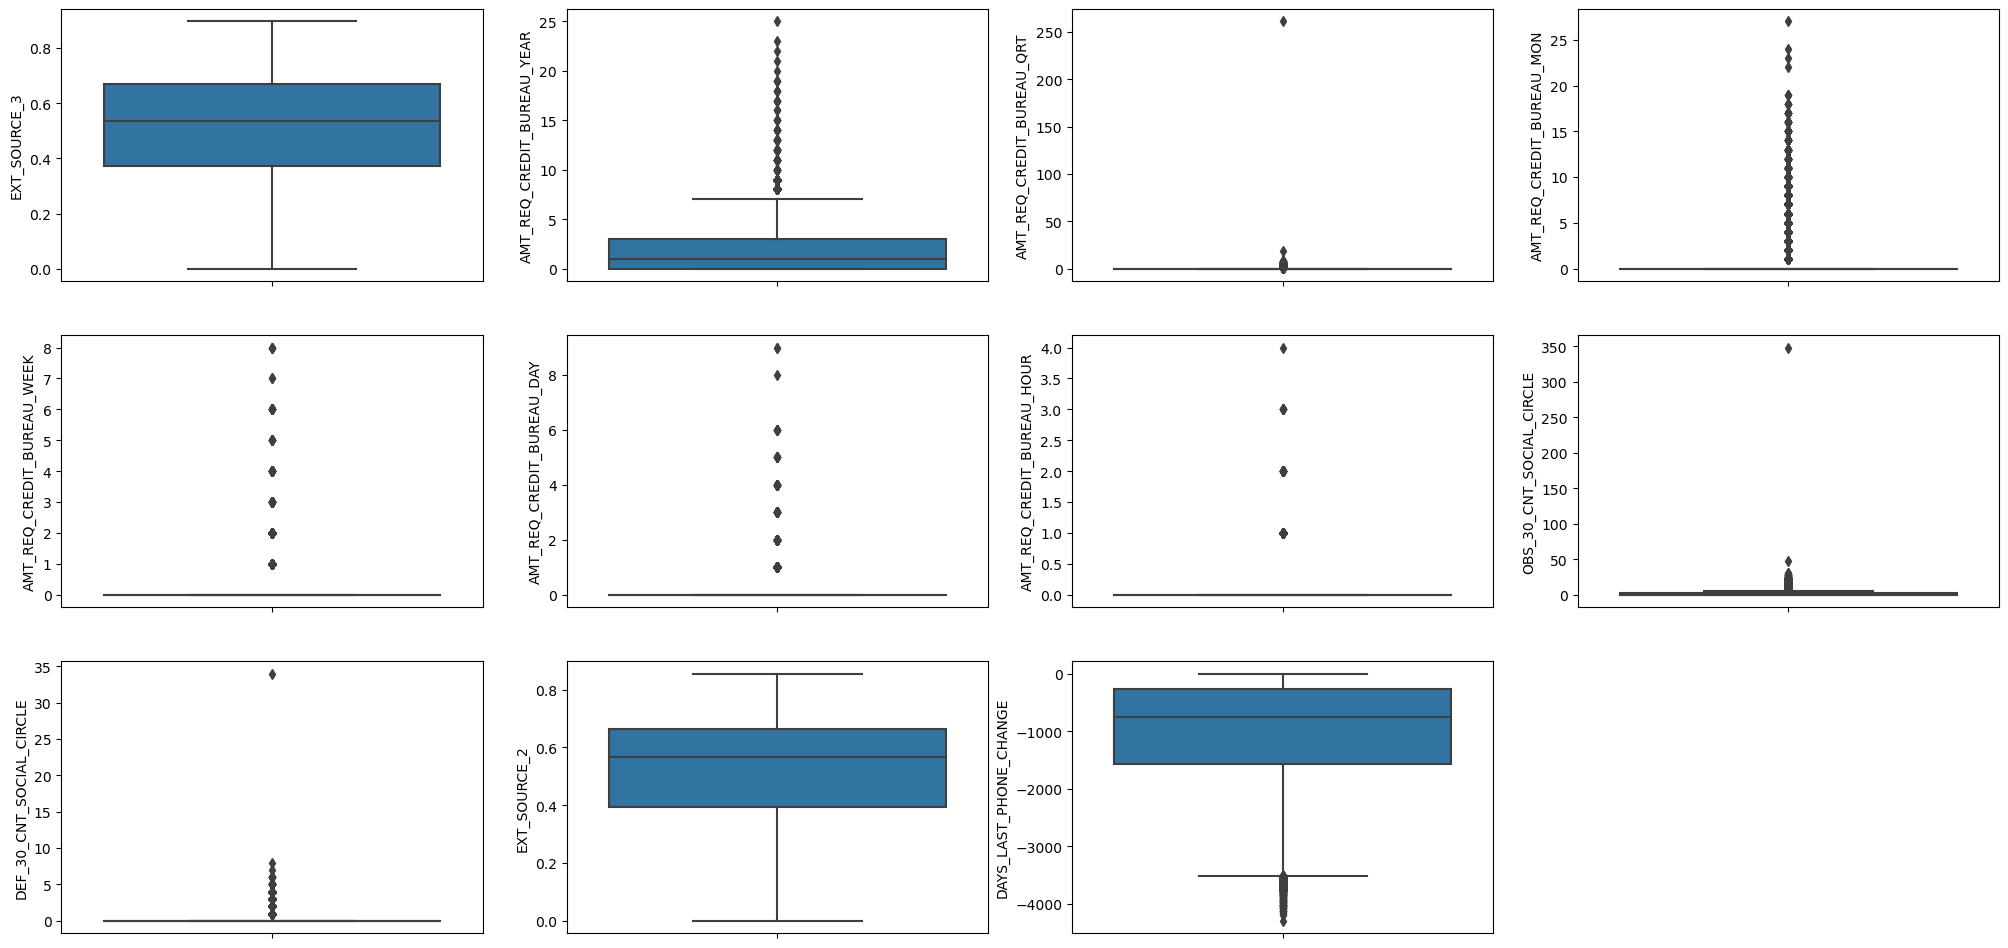

In [59]:
plt.figure(figsize=(25,12))

for i in range(len(null_columns)):
  plt.subplot(3,4,i+1)
  sns.boxplot(y=df[null_columns[i]])

Feature dengan nilai null yang memiliki persebaran normal dan tanpa outlier akan diimputasi dengan nilai mean sedangkan feature yang memiliki outlier akan diimputasi dengan nilai median.<br><br>

EXT_SOURCE_3 -> Mean <br>
AMT_REQ_CREDIT_BUREAU_YEAR -> Median <br>
AMT_REQ_CREDIT_BUREAU_QRT -> Median <br>
AMT_REQ_CREDIT_BUREAU_MON -> Median <br>
AMT_REQ_CREDIT_BUREAU_WEEK -> Median <br>
AMT_REQ_CREDIT_BUREAU_DAY -> Median <br>
AMT_REQ_CREDIT_BUREAU_HOUR -> Median <br>
OBS_30_CNT_SOCIAL_CIRCLE -> Median <br>
DEF_30_CNT_SOCIAL_CIRCLE -> Median <br>
EXT_SOURCE_2 -> Mean <br>
DAYS_LAST_PHONE_CHANGE -> Median <br>

In [49]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)

df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace=True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

## Feature Transformation

In [61]:
df.select_dtypes(include='object').head(1)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married


In [50]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Value count column NAME_EDUCATION_TYPE:
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dt

### Label Encoding

In [51]:
# Mapping Gender dan Education
mapping_gender = {
    'F' : 0,
    'M' : 1
}

# Mapping Education
mapping_education = {
    'Secondary / secondary special' : 1, # SMA
    'Higher education' : 3, # S1
    'Incomplete higher' : 2, # D3
    'Lower secondary' : 0, # SMP
    'Academic degree' : 4 # S2+
}

# Mapping Yes/No
mapping_yn = {
    'Y' : 0,
    'N' : 1
}

df['CODE_GENDER'] = df['CODE_GENDER'].map(mapping_gender)
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(mapping_education)
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map(mapping_yn)
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map(mapping_yn)

In [52]:
df_test['CODE_GENDER'] = df_test['CODE_GENDER'].map(mapping_gender)
df_test['NAME_EDUCATION_TYPE'] = df_test['NAME_EDUCATION_TYPE'].map(mapping_education)
df_test['FLAG_OWN_CAR'] = df_test['FLAG_OWN_CAR'].map(mapping_yn)
df_test['FLAG_OWN_REALTY'] = df_test['FLAG_OWN_REALTY'].map(mapping_yn)

### One Hot Encoding

In [65]:
df.select_dtypes(include='object').head(1)

,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
0,Cash loans,Working,Single / not married


In [53]:
for col in df.select_dtypes(include='object').columns:
    ohe = pd.get_dummies(df[col], prefix=col)
    df = df.join(ohe)

In [54]:
df_test.select_dtypes(include='object').head(1)

,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
0,Cash loans,Working,Married


In [55]:
for col in df_test.select_dtypes(include='object').columns:
    ohe = pd.get_dummies(df_test[col], prefix=col)
    df_test = df_test.join(ohe)

In [56]:
df_test.drop(df.select_dtypes(include='object').columns.tolist(),axis=1,inplace=True)
df.drop(df.select_dtypes(include='object').columns.tolist(),axis=1,inplace=True)

## Train/Test Split

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Feature Scaling

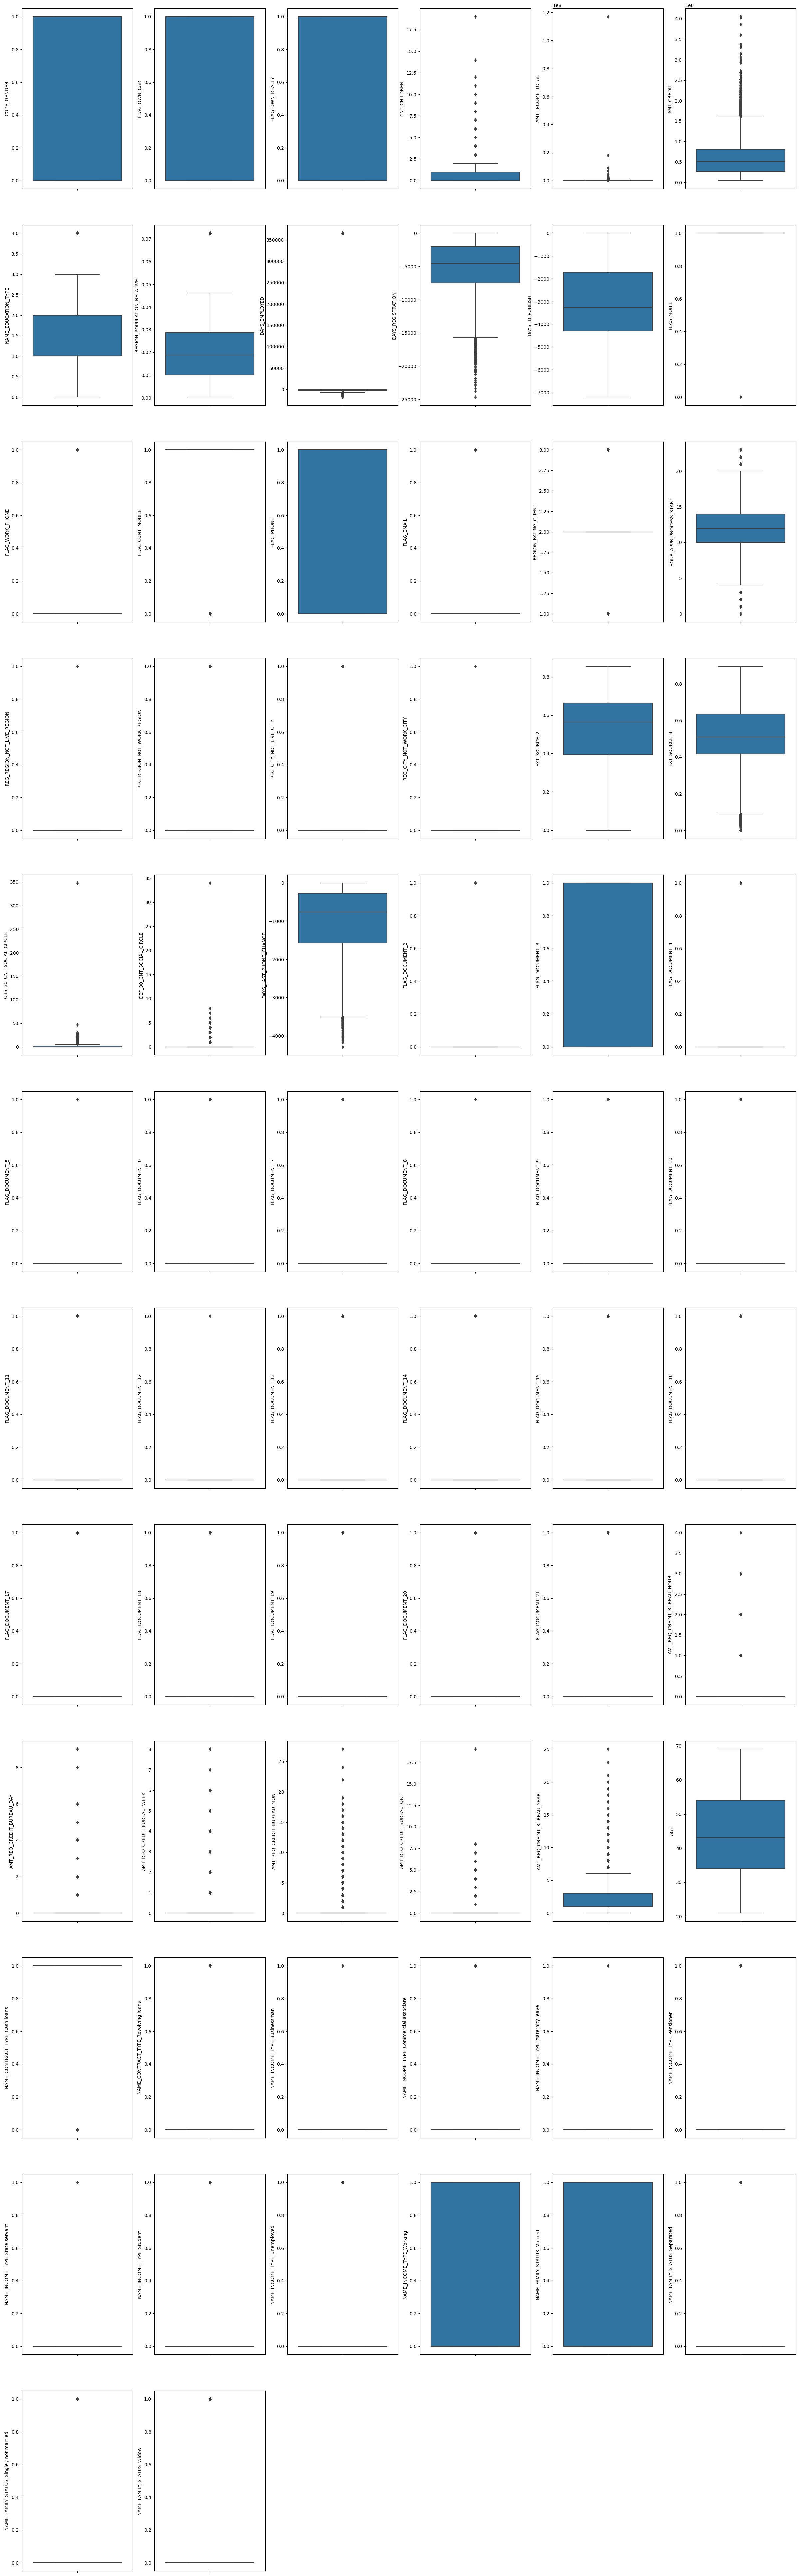

In [71]:
plt.figure(figsize=(30,100))

for i in range(len(X_train.columns)):
  plt.subplot(12,6,i+1)
  sns.boxplot(y=X_train[X_train.columns[i]])

Feature yang memiliki outlier akan dilakukan normalisasi sedangkan yang tidak memiliki outlier akan distandarisasi.<br>
- Normalisasi: 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'
<BR>
- Standarisasi: 'DAYS_ID_PUBLISH'

In [58]:
norm = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE']
std = ['DAYS_ID_PUBLISH']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in range (len(norm)):
  norm_scaler = MinMaxScaler()
  X_train[norm[i]] = norm_scaler.fit_transform(X_train[norm[i]].values.reshape(len(X_train),1))
  X_test[norm[i]] = norm_scaler.transform(X_test[norm[i]].values.reshape(len(X_test),1))
  df_test[norm[i]] = norm_scaler.transform(df_test[norm[i]].values.reshape(len(df_test),1))

std_scaler = StandardScaler()
X_train[std] = std_scaler.fit_transform(X_train[std].values.reshape(len(X_train),1))
X_test[std] = std_scaler.transform(X_test[std].values.reshape(len(X_test),1))
df_test[std] = std_scaler.transform(df_test[std].values.reshape(len(df_test),1))

## SMOTE

Kita akan melakukan oversampling karena targetnya imbalanced.

In [59]:
from imblearn.over_sampling import SMOTE

X_train_1 = X_train.copy() #backup
y_train_1 = y_train.copy() #backup

X_train, y_train = SMOTE().fit_resample(X_train,y_train)

# MODELING STAGE

Metric yang akan kita maksimalkan dalam modeling ini adalah f1_score karena dataset ini merupakan kasus imbalance dan f1_score merupakan metric yang tepat karena fokus dengan ketepatan model dalam meminimalisir False Positive (FP) dan False Negative (FN) atau recall dan precision. Namun, jika nilai f1_score yang ideal tidak dapat tercapai, maka kita akan fokus memaksimalkan nilai recall dibanding precision karena dalam kasus peminjaman, nilai FN lebih penting untuk diminimalisir dibanding FP karena lebih merugikan untuk perusahaan dalam salah memprediksi client yang berpotensi terlambat bayar dibanding salah memprediksi client yang berpotensi tepat waktu.

In [169]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn import metrics

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                         columns = [i for i in ['Predict 1','Predict 0']])
    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm,annot=True,fmt = 'g',cmap='viridis')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize = (10,8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
eval_classification(logreg)

Accuracy (Train Set): 0.70
Accuracy (Test Set): 0.69
Precision (Train Set): 0.69
Precision (Test Set): 0.16
Recall (Train Set): 0.70
Recall (Test Set): 0.65
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.25
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.73


### Hyperparameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.005, 0.01]
solver=['lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='precision', random_state=42, cv=5, n_iter=20)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.69
Precision (Train Set): 0.69
Precision (Test Set): 0.16
Recall (Train Set): 0.70
Recall (Test Set): 0.65
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.25
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.73


## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.84
Precision (Train Set): 1.00
Precision (Test Set): 0.13
Recall (Train Set): 1.00
Recall (Test Set): 0.18
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.15
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.54


### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = { 
    "min_samples_leaf":[int(x) for x in np.linspace(2, 100, 50)],
    "min_samples_split":[int(x) for x in np.linspace(2, 30, 20)],
    "max_depth": [int(x) for x in np.linspace(2, 100, 50)]
    }
# Set up score
scoring = ['f1']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='f1', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0, random_state=42)

random_result = random_search.fit(X_train, y_train)

eval_classification(random_result)

Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.89
Precision (Train Set): 0.97
Precision (Test Set): 0.18
Recall (Train Set): 0.90
Recall (Test Set): 0.10
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.13
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.61


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92
Precision (Train Set): 1.00
Precision (Test Set): 0.28
Recall (Train Set): 1.00
Recall (Test Set): 0.02
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.04
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.70


Dari ketiga model tersebut, model Logistic Regression memiliki f1 score dan recall yang paling baik.<br>
Oleh karena itu, kita akan fokus mengoptimalkan model tersebut (model RF tidak dihyperparameter tune karena resource waktunya terlalu lama).

## Feature Importance (Coefficient LogReg)

In [128]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.coef_.reshape(68), index = X_train.columns)
    ax = np.abs(feat_importances).nlargest(68).sort_values(ascending=False).plot(kind='barh', figsize = (10,20))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'feature importance score: {model}')

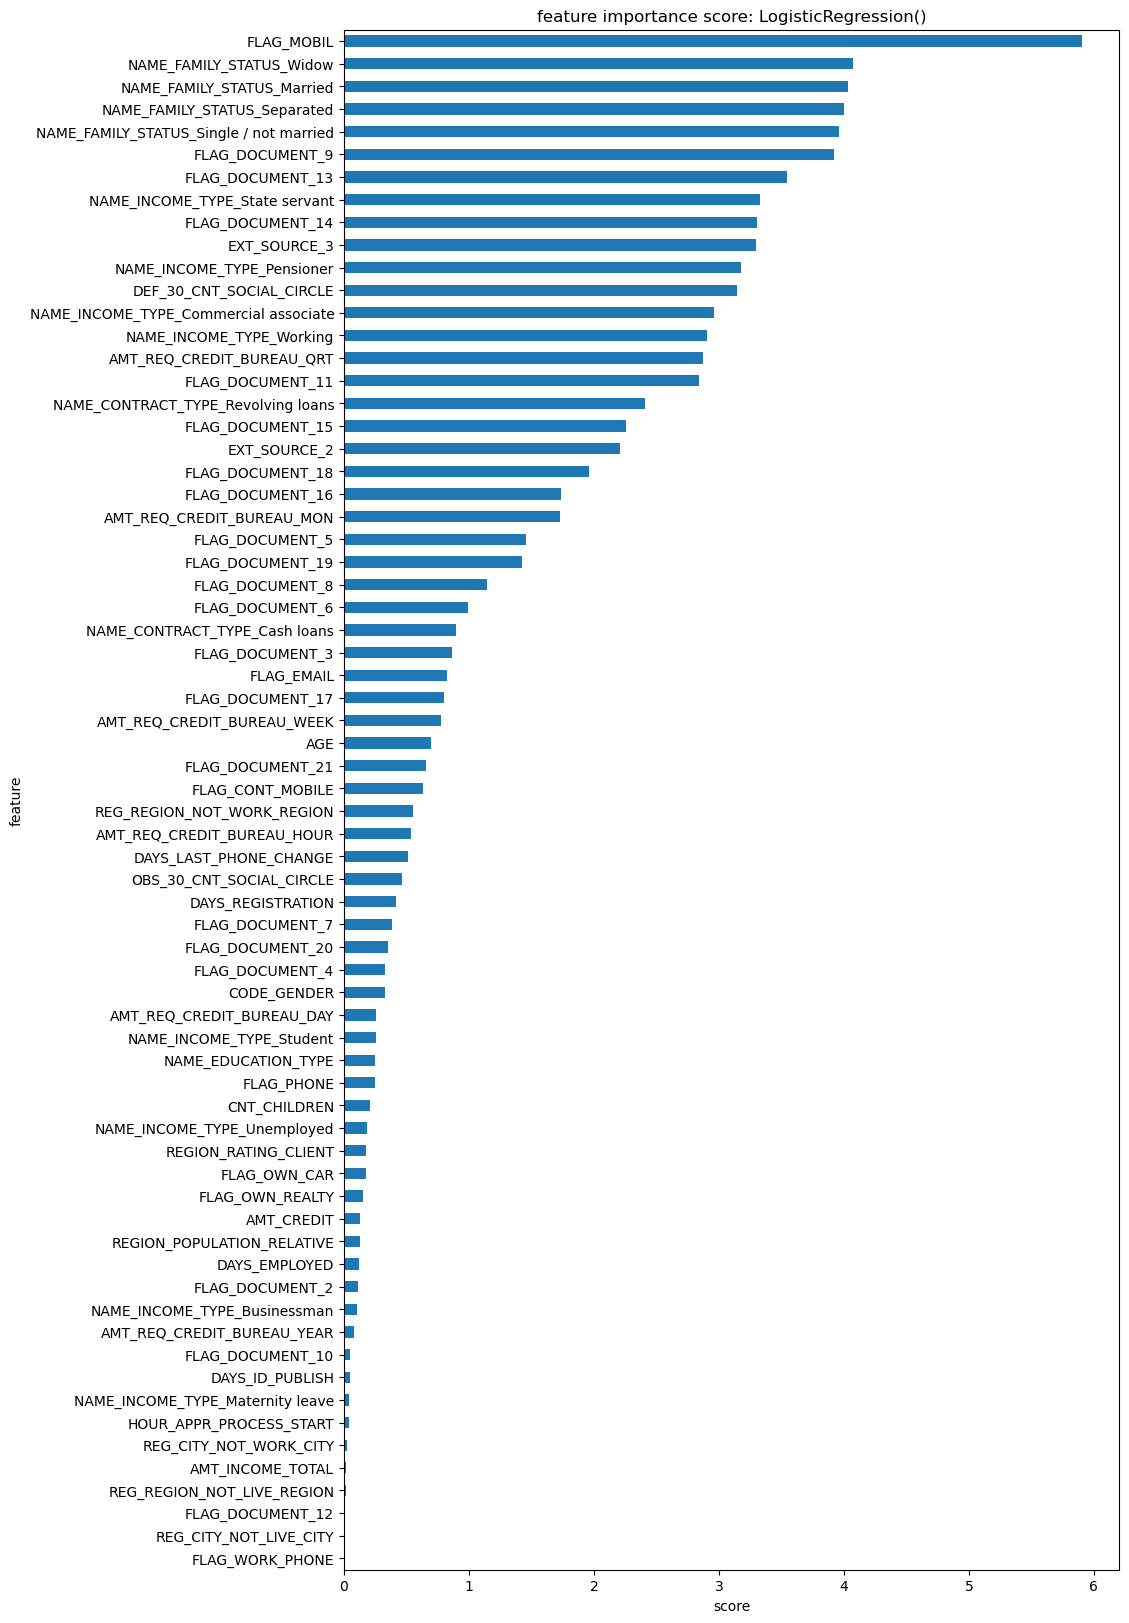

In [129]:
show_feature_importance(logreg)

In [162]:
feat_importances = pd.Series(logreg.coef_.reshape(68), index = X_train.columns)
top_features = np.abs(feat_importances.nlargest(60)).sort_values(ascending=False)
top_features

FLAG_MOBIL                               5.906134
EXT_SOURCE_3                             3.298298
NAME_INCOME_TYPE_Pensioner               3.179762
DEF_30_CNT_SOCIAL_CIRCLE                 3.143819
NAME_INCOME_TYPE_Commercial associate    2.961785
NAME_INCOME_TYPE_Working                 2.905535
AMT_REQ_CREDIT_BUREAU_QRT                2.869510
FLAG_DOCUMENT_11                         2.841560
NAME_CONTRACT_TYPE_Revolving loans       2.409816
FLAG_DOCUMENT_15                         2.253856
EXT_SOURCE_2                             2.209605
FLAG_DOCUMENT_18                         1.958889
FLAG_DOCUMENT_16                         1.733335
AMT_REQ_CREDIT_BUREAU_MON                1.729127
FLAG_DOCUMENT_5                          1.456836
FLAG_DOCUMENT_19                         1.422587
FLAG_DOCUMENT_8                          1.143242
FLAG_DOCUMENT_6                          0.989430
NAME_CONTRACT_TYPE_Cash loans            0.897870
FLAG_DOCUMENT_3                          0.864859


Model yang didapat masih memiliki ruang improvisasi yang sangat besar sehingga masih perlu dipelajari data-data yang ada untuk mencari feature yang berkorelasi kuat terhadap target.